In [11]:
# Import packages
import librosa
import numpy as np
from librosa.feature import tonnetz
from librosa import display
from matplotlib import pyplot as plt
from matplotlib import style, rcParams
style.use('seaborn')
rcParams['figure.figsize'] = (16, 8)


In [13]:
def get_ton(data, rate, plot=False):
    """
        Return the tonal centroids at each time step/frame as a list of 1xt arrays.
        The rows of the array correspond to the following:
            0: Fifth x-axis
            1: Fifth y-axis
            2: Minor x-axis
            3: Minor y-axis
            4: Major x-axis
            5: Major y-axis
    """
    
    # Get the tonnetz
    ton = tonnetz(data, rate)[:, :1000]

    # If requested, plot
    if plot:
        display.specshow(ton, x_axis='time', y_axis='tonnetz', cmap='coolwarm')
        plt.colorbar()
        plt.title('Tonal Centroids (Tonnetz)')
        plt.show()
        
    # Separate into a list of arrays truncated to time index 1000 and return the list
    ton_list = []
    for k in range(ton.shape[0]):
        ton_list.append(np.mean(ton[k, :]))
        ton_list.append(np.var(ton[k, :]))
        
    return ton_list


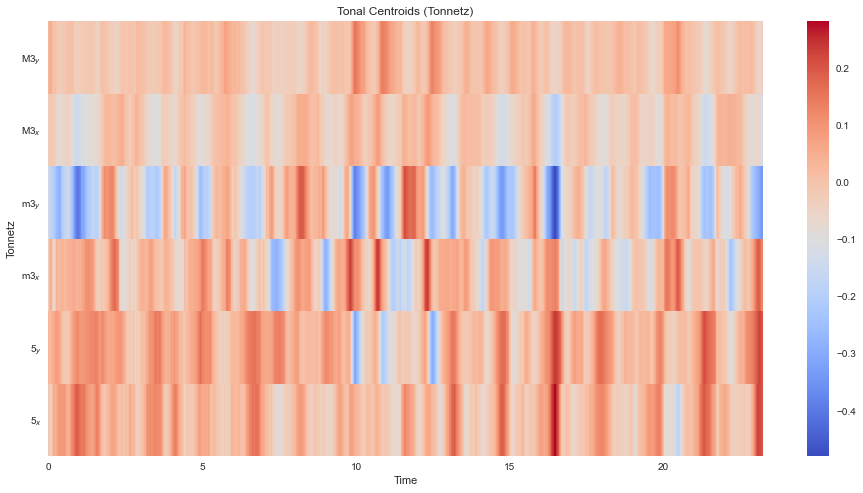

In [14]:
filepath = './../data/wavs/010527.wav'
data, rate = librosa.load(filepath)
test = get_ton(data, rate, plot=True)


In [16]:
test = get_ton(data, rate)
for k in range(len(test)):
    print(test[k])


0.031655147530799295
0.0052287504329016415
0.0397439403785783
0.0069437722339548156
-0.003629063719883999
0.00929803262885072
-0.08678267061524136
0.017764371894790878
-0.028474723774984695
0.0027835101053680267
0.0034200807251036362
0.0015187255053335598
